In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import BoxStyle
from matplotlib.path import Path
from shapely import geometry
from gasmarketmodel.params import europe_frame
import numpy as np
from PIL import Image

<AxesSubplot:>

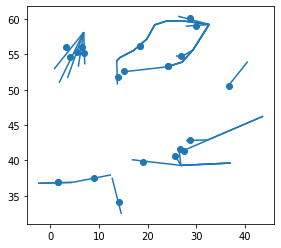

In [9]:
# Read in world data
connections_gdf = gpd.read_file("/home/flo/code/freichel/gasmarketmodel/gasmarketmodel/data/params/piped_imports.geojson")
connections_gdf.plot()